In [1]:
#!python -m pip install --upgrade pip

#!pip install tensorflow==2.3.1 

#!pip install tensorboard==2.4.1

#!pip install torch  

#!pip install --upgrade protobuf==3.20.0

#!pip install --upgrade numpy




In [2]:
#!set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


In [3]:
import torch # YOLOv5 implemented using pytorch

In [4]:
import torch # YOLOv5 implemented using pytorch

In [6]:
%cd yolov5
!pip install -r requirements.txt

d:\DSGP\v5\project\yolov5


In [7]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'D:/DSGP/v5/project/dataset/images/train'
valPath = 'D:/DSGP/v5/project/dataset/images/val'
crsPath = 'D:/DSGP/v5/project/data/ts' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  135
Validation images are :  33


In [8]:

trainimagePath = 'D:/DSGP/v5/project/dataset/images/train'
trainlabelPath = 'D:/DSGP/v5/project/dataset/labels/train'
valimagePath = 'D:/DSGP/v5/project/dataset/images/val'
vallabelPath = 'D:/DSGP/v5/project/dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
#shutil.move(crsPath, valPath) 




In [9]:
!python train.py --img 640 --batch 16 --epochs 25 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-283-g875d9278 Python-3.12.1 torch-2.2.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=

In [2]:
!pip install tensorboard


  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached google_auth-2.27.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached google_auth_oauthlib-1.2.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached Markdown-3.5.2-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.5.1-py2.py3-none-any.whl.metadata (8.6 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached google_auth-2.27.0-py2.py3-none-any.whl (186 kB)
Using cached google_auth_oauthlib-1.2.0-py2.py3-none-any.whl (24 kB)
   ------------------

In [2]:
%reload_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 17884), started 0:08:51 ago. (Use '!kill 17884' to kill it.)

In [12]:
!python yolov5/detect.py --source yolov5/runs/train/exp2/b.jpg --weights yolov5/runs/train/exp2/weights/best.pt

detect: weights=['yolov5/runs/train/exp2/weights/best.pt'], source=yolov5/runs/train/exp2/b.jpg, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-283-g875d9278 Python-3.12.1 torch-2.2.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 D:\DSGP\v5\project\yolov5\runs\train\exp2\b.jpg: 384x640 25 Cars, 1 Truck, 1 Motorcycle, 82.5ms
Speed: 3.0ms pre-process, 82.5ms inference, 8.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5\runs\detect\exp11


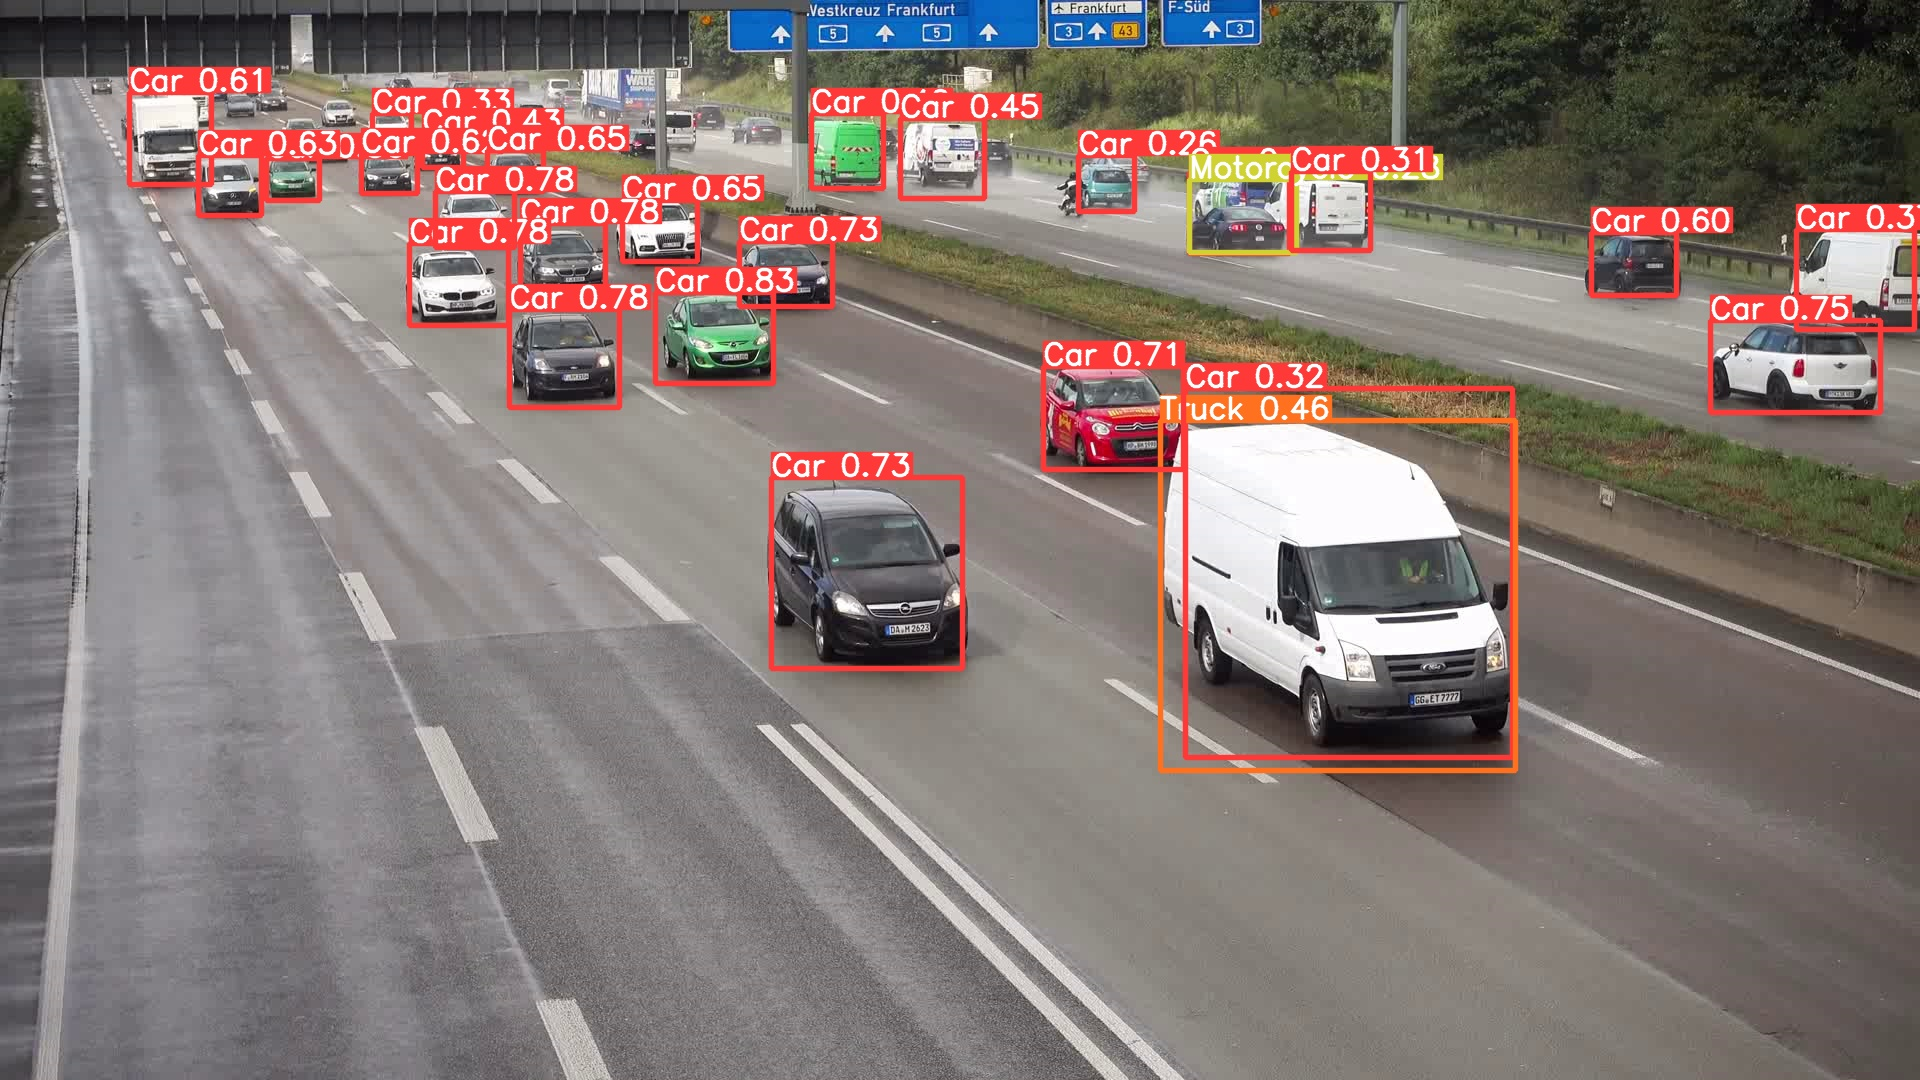

In [25]:
Image(filename='yolov5/runs/detect/exp11/b.jpg', width=640)

In [1]:
from utils.plots import plot_results 
plot_results(save_dir='yolov5/runs/train/exp2/results.csv')  

ModuleNotFoundError: No module named 'utils'